In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-05-23 05:52:36--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-23 05:52:36--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.001s  

2022-05-23 05:52:36 (87.9 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# Упражнение 1.1

Была проверена работа примеров в блокноте chap01.ipynb

# Упражнение 1.2

Был скачан образец звука с сайта http://freesound.org, включающий музыку. Для удобства скачанный образец был добавлен в персональный fork ThinkDSP.

In [2]:
!wget -O dublie_trumpet.wav https://github.com/BozhkoAV/ThinkDSP/blob/master/code/170255__dublie__trumpet.wav?raw=true

--2022-05-23 05:52:36--  https://github.com/BozhkoAV/ThinkDSP/blob/master/code/170255__dublie__trumpet.wav?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BozhkoAV/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav [following]
--2022-05-23 05:52:36--  https://github.com/BozhkoAV/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/170255__dublie__trumpet.wav [following]
--2022-05-23 05:52:36--  https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/170255__dublie__trumpet.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuser

In [3]:
from thinkdsp import read_wave
wave = read_wave('dublie_trumpet.wav')
wave.make_audio()

Был выделен полусекундный сегмент, в котором высота постоянна.

In [4]:
segment = wave.segment(start = 3, duration = 0.5)
segment.make_audio()

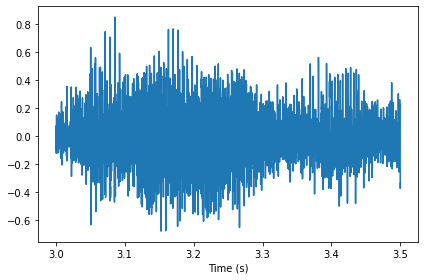

In [5]:
from thinkdsp import decorate
segment.plot()
decorate(xlabel='Time (s)')

Был вычислен и распечатан спектр выбранного сегмента.

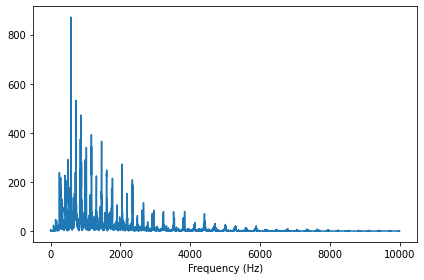

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

Были использованы high_pass, low_pass и band_stop для фильтрации гармоник, после чего спектры были преобразованы обратно в сигнал.

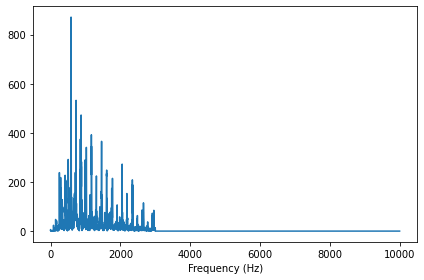

In [7]:
spectrum_low_pass = segment.make_spectrum()
spectrum_low_pass.low_pass(cutoff=3000)
spectrum_low_pass.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

**low_pass** применяет фильтр нижних частот (ФНЧ), при этом компоненты **выше** частоты среза ослабляются.

In [8]:
wave_low_pass = spectrum_low_pass.make_wave()
wave_low_pass.make_audio()

Фильтр НЧ удаляет "яркие" высокочастотные звуки, и результат звучит глуше, "темнее".

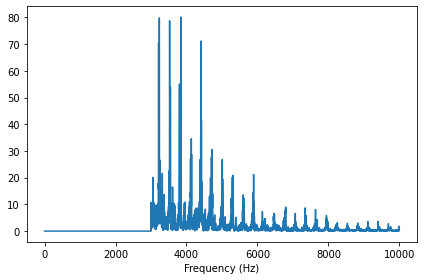

In [9]:
spectrum_high_pass = segment.make_spectrum()
spectrum_high_pass.high_pass(cutoff=3000)
spectrum_high_pass.plot(high=10000)
decorate(xlabel='Frequency (Hz)')
wave_high_pass = spectrum_high_pass.make_wave()
wave_high_pass.make_audio()

**high_pass** применяет фильтр нижних частот (ФНЧ), при этом компоненты **ниже** частоты среза ослабляются.

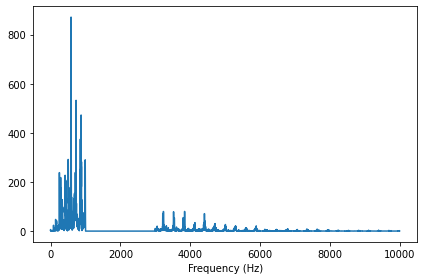

In [10]:
spectrum_band_stop = segment.make_spectrum()
spectrum_band_stop.band_stop(low_cutoff=1000, high_cutoff=3000)
spectrum_band_stop.plot(high=10000)
decorate(xlabel='Frequency (Hz)')
wave_band_stop = spectrum_band_stop.make_wave()
wave_band_stop.make_audio()

**band_stop** применяет полосно-заграждающий фильтр (ФПЗ), он ослабляет компоненты в полосе частот **между двумя частотами среза**.

# Упражнение 1.3

Был создан сложный сигнал из объектов SinSignal и CosSignal, путём их суммирования.

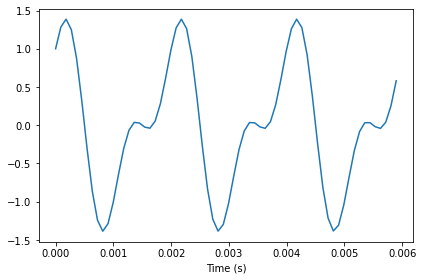

In [11]:
import thinkdsp
cos_sig = thinkdsp.CosSignal(freq=500, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=1000, amp=0.6, offset=0)
mix = cos_sig + sin_sig
mix.plot()
decorate(xlabel='Time (s)')

Полученный сигнал был обработан для получения wave.

In [12]:
wave = mix.make_wave(duration=2, start=0, framerate=22050)
wave.make_audio()

Был вычислен Spectrum.

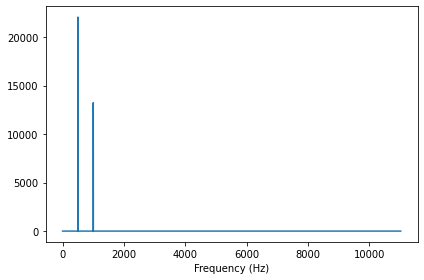

In [13]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Была добавлена частотная компонента не кратная двум основным.

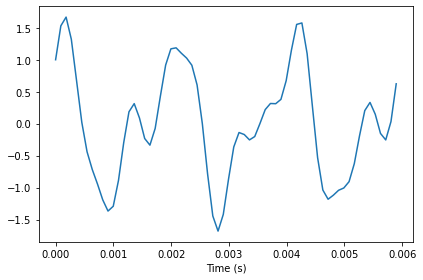

In [14]:
sin_sig_2 = thinkdsp.SinSignal(freq=1700, amp=0.3, offset=0)
mix += sin_sig_2
mix.plot()
decorate(xlabel='Time (s)')

In [15]:
wave = mix.make_wave(duration=2, start=0, framerate=22050)
wave.make_audio()

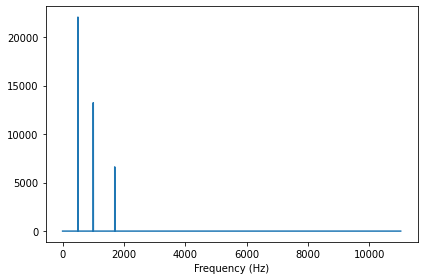

In [16]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Звук, полученный для трёх частотных компонент, отличается от звука, полученного для двух частотных компонент.

# Упражнение 1.4

Была написана функция **stretch**, берущая wave и коэффициент изменения, для того чтобы ускорить или замедлить сигнал изменением ts и framerate.

In [17]:
def stretch(wave, coef):
  wave.ts *= coef
  wave.framerate /= coef
  wave.plot()
  audio = wave.make_audio()
  display(audio)
  # последние две строки отменяют внесённые изменения для удобного использования слайдера coef
  wave.ts /= coef
  wave.framerate *= coef

ts - массив моментов выборки или преобразования сигнала

framerate - число выборок в единицу времени

In [18]:
wave = read_wave('dublie_trumpet.wav')
audio = wave.make_audio()
display(audio)

In [19]:
from ipywidgets import interact, fixed
wave = read_wave('dublie_trumpet.wav')
interact(stretch, wave=fixed(wave), coef=(0.5, 1.5, 0.1))

interactive(children=(FloatSlider(value=1.0, description='coef', max=1.5, min=0.5), Output()), _dom_classes=('…

<function __main__.stretch>